# Passive Droplet in an $\infty~3D$ domain - with an external gradient

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
plt.rcParams.update({'font.size': 15})

In [3]:
%config InlineBackend.figure_format ='retina' # Disable for the cluster

In [4]:
import traceback

### Importing the code + PyPackage in the cluster

In [5]:
############################## BEGIN CLUSTER STUFF ##############################

# Preserve environment variables
#$ -V

# Use python as shell
#$ -S /home/ajinkya/anaconda3/bin/python3

# Execute from current working directory
#$ -cwd

##############################

#file = open("/home/ajinkya/github-code/package_path.txt", "r") # Cluster version

############################## END CLUSTER STUFF ##############################

### Importing the code + PyPackage locally

In [6]:
import sys

sys.path.append('/Users/ajinkyakulkarni/Desktop/GitHub/py-pde')
import pde

sys.path.append('/Users/ajinkyakulkarni/Desktop/GitHub/py-droplets')
import droplets

sys.path.append('/Users/ajinkyakulkarni/Desktop/GitHub/py-phasesep')
import phasesep

sys.path.append('/Users/ajinkyakulkarni/Desktop/GitHub/agent-based-emulsions')
import agent_based

######################################################################################################################

In [7]:
import os

os.system('rm *.dat *.out *.hdf5 *.png *.mov *.npy *.pdf *.txt')

rm: *.dat: No such file or directory
rm: *.png: No such file or directory
rm: *.mov: No such file or directory
rm: *.pdf: No such file or directory


256

### Set the version of the simulations - Cluster or Local test on the laptop

In [8]:
# VERSION = 'TEST'

VERSION = 'CLUSTER'

print('VERSION is', VERSION)

print()

VERSION is CLUSTER



In [9]:
file = open("VERSION.out", "w")
file.write(str(VERSION))
file.close()

### Set the physical parameters

In [10]:
KAPPA = 0.25 # Gives interface width ~= 1

PREFACTOR_FREE_ENERGY_DENSITY = 1

# This is value of b in f = (b/2)*c*c*(1-c)*(1-c)

MOBILITY = 1

### Define the PDE and the Free Energy used

In [11]:
f = phasesep.GinzburgLandau2Components()

f.expression

'0.5 * c**2 * (1 - c)**2'

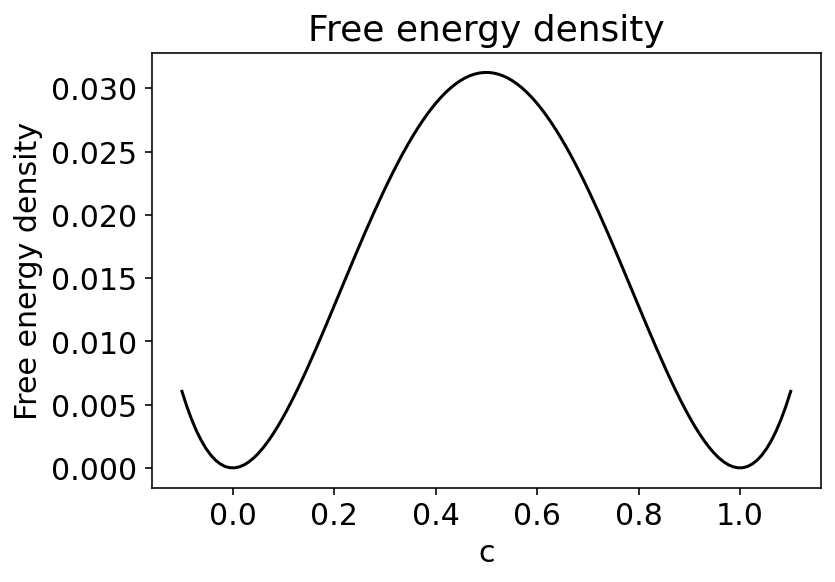

In [12]:
f.plot(extent = [-0.1, 1.1], title = 'Free energy density')

In [13]:
GAMMA = (np.sqrt(PREFACTOR_FREE_ENERGY_DENSITY * KAPPA))/6

print('GAMMA is', GAMMA)
print()

GAMMA is 0.08333333333333333



In [14]:
W = 2 * np.sqrt(KAPPA/PREFACTOR_FREE_ENERGY_DENSITY) # Analytical Interface Width

print('Interface width is', W)
print()

Interface width is 1.0



In [15]:
DIFFUSION = PREFACTOR_FREE_ENERGY_DENSITY * MOBILITY

K0 = DIFFUSION/(W**2)

print('DIFFUSION is', DIFFUSION)
print()

DIFFUSION is 1



### Calculate boundary conditions for a specific gradient and mean supersaturation

In [16]:
################ DEFINE THE GRID for Cahn Hilliard Simulations ################

if (VERSION == 'TEST'):
    
    limit_r = int(5e1)

if (VERSION == 'CLUSTER'):
    
    limit_r = int(4e2)

limit_z_by_limit_r = 3

limit_z = limit_z_by_limit_r * limit_r

In [17]:
print('Radial box bounds for Cahn-Hilliard simulations are 0,', limit_r)

print()

print('Height box bounds for Cahn-Hilliard simulations are 0,', limit_z)

print()

Radial box bounds for Cahn-Hilliard simulations are 0, 400

Height box bounds for Cahn-Hilliard simulations are 0, 1200



In [18]:
################ DEFINE THE GRID for Agent Based Model Simulations ################

CH_volume = (np.pi) * (limit_r * limit_r) * (limit_z)

# Volume of the AGM box should be equal to the volume of the CH cylinderical Grid

AGM_SYSTEM_SIZE = int((CH_volume)**(1/3))

AGM_volume = AGM_SYSTEM_SIZE**3

In [19]:
print('Size bounds for Agent Based simulations are 0,', AGM_SYSTEM_SIZE)

print()

Size bounds for Agent Based simulations are 0, 844



In [20]:
volume_difference = 100 * abs(AGM_volume - CH_volume)/CH_volume

if (volume_difference > 5): # Some arbitrary value for unacceptable volume difference

    raise ValueError('Unacceptable volume difference between AGM and CH domains')
    
print('Volume difference is', volume_difference, '%')
print()

Volume difference is 0.3272964190539016 %



### Function to go from phi_top and phi_bottom ---> alpha and beta

In [21]:
C_bottom_CH = 0

# C_top_CH = C_TOP_CH

C_top_CH = 0.1

print('C_bottom_CH is ', C_bottom_CH)
print()
print('C_top_CH is ', C_top_CH)
print()

C_bottom_CH is  0

C_top_CH is  0.1



In [22]:
mu_bottom_CH = f.chemical_potential(C_bottom_CH)

mu_top_CH = f.chemical_potential(C_top_CH)

print('mu_bottom is ', mu_bottom_CH)
print()
print('mu_top is ', mu_top_CH)
print()

mu_bottom is  0

mu_top is  0.07200000000000001



In [23]:
ALPHA = (C_bottom_CH + C_top_CH)/2 

# Alpha according to Eq 3.12 in Weber et al review

BETA = (C_top_CH - C_bottom_CH)/limit_z 

# Beta according to Eq 3.12 in Weber et al review

In [24]:
print('C_mean is ', ALPHA)
print()
print('imposed_gradient is ', BETA)
print()

C_mean is  0.05

imposed_gradient is  8.333333333333334e-05



### Determine concentration values that need to be imposed for Agent Based Simulations

In [25]:
C_bottom_y_AGM = ALPHA - (BETA * AGM_SYSTEM_SIZE)/2

C_top_y_AGM = ALPHA + (BETA * AGM_SYSTEM_SIZE)/2

print('C_bottom_y_AGM for AGM is ', C_bottom_y_AGM)
print()
print('C_top_y_AGM for AGM is ', C_top_y_AGM)
print()

C_bottom_y_AGM for AGM is  0.01483333333333333

C_top_y_AGM for AGM is  0.08516666666666667



### Define Critical radius at the centre of the AGM and CH box

In [26]:
R_critical_theory = 2*GAMMA/ALPHA

print('Critical_radius is', R_critical_theory)

print()

################################################################################################################

file = open("R_critical_theory.out", "w")
file.write(str(R_critical_theory))
file.close()

Critical_radius is 3.333333333333333



### Specify initial radius of the droplet

In [27]:
# initial_radius = 1.5 * R_critical_theory

initial_radius = int(20*W)

print('initial_radius is', initial_radius)

print()

initial_radius is 20



In [28]:
np.save('initial_radius.npy', initial_radius)

### Specify Tmax and Tracking interval for the simulations

In [29]:
if (VERSION == 'TEST'):
    
    T_max = int(1e2)
    
if (VERSION == 'CLUSTER'):
    
    T_max = int(1e4)

print('T_max is', T_max)
print()

T_max is 10000



In [30]:
np.save('T_max.npy', T_max)

######################################################################################################################

### Generate the scalarfield

In [31]:
support_points_r = int(2 * limit_r)

support_points_z = int(2 * limit_z)

CH_grid = pde.CylindricalGrid(limit_r, [-limit_z/2, limit_z/2], 
                              [support_points_r, support_points_z], 
                              periodic_z = False)

In [32]:
CH_grid.discretization

array([0.5, 0.5])

In [33]:
r_bounds = np.linspace(0, limit_r, support_points_r)

z_bounds = np.linspace(-limit_z/2, limit_z/2, support_points_z)

In [34]:
# Outside and inside concentration profile according to IN-FINITE box analytics

C_in_AND_C_out = np.zeros((support_points_r, support_points_z))

for i in range(support_points_z):

    for j in range(support_points_r):

        r = np.sqrt(z_bounds[i]**2 + r_bounds[j]**2)

        phi = math.atan2(r_bounds[j], z_bounds[i])
                         
        if (r > initial_radius):

            C_in_AND_C_out[j, i] = ALPHA*(-initial_radius/r + 1) + \
                                    BETA*(r - initial_radius**3/r**2)*np.cos(phi) + \
                                    2*GAMMA/r

        else:

            C_in_AND_C_out[j, i] = 1 + 2*GAMMA/initial_radius

In [35]:
Initial_ScalarField = pde.ScalarField(CH_grid, C_in_AND_C_out)

Initial_ScalarField = Initial_ScalarField.smooth()

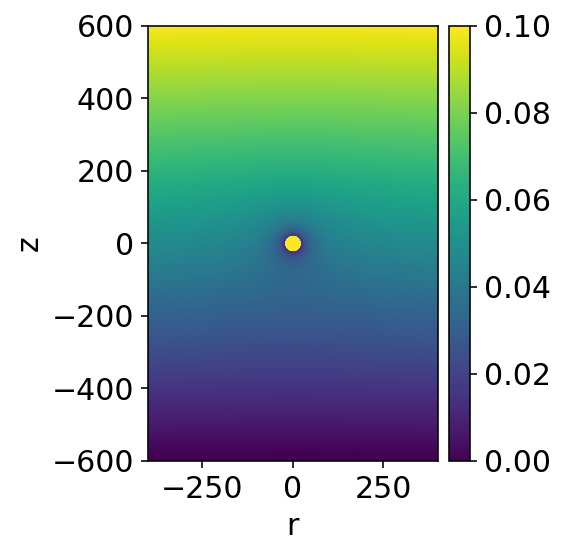

In [36]:
Initial_ScalarField.plot(vmin = 0, vmax = 0.1)

In [37]:
initial_emulsion = droplets.locate_droplets(Initial_ScalarField, refine = True)

initial_emulsion.get_size_statistics()

# ### Calculate the deviation of the droplet radius from smoothening vs original intended radius

detected_intial_radius = initial_emulsion.get_size_statistics()['radius_mean']

error_detected_intial_radius = (100 * abs(detected_intial_radius - initial_radius))/initial_radius

print('Error in detected radius is', round(error_detected_intial_radius, 2), '%')

print()

################################################################################

if (error_detected_intial_radius > 5):

    raise ValueError('Large error detected. Decrease level of smoothening?')

initial_radius_AGM = initial_emulsion.get_size_statistics()['radius_mean']

np.save('initial_radius_AGM.npy', initial_radius_AGM)

Error in detected radius is 0.67 %



In [38]:
print(initial_radius_AGM)

print(initial_radius)

print()

20.134748173942942
20



In [39]:
Initial_ScalarField.to_file("Initial_Scalarfield.hdf5")

In [40]:
Initial_ScalarField_copy = pde.FieldBase.from_file("Initial_Scalarfield.hdf5")

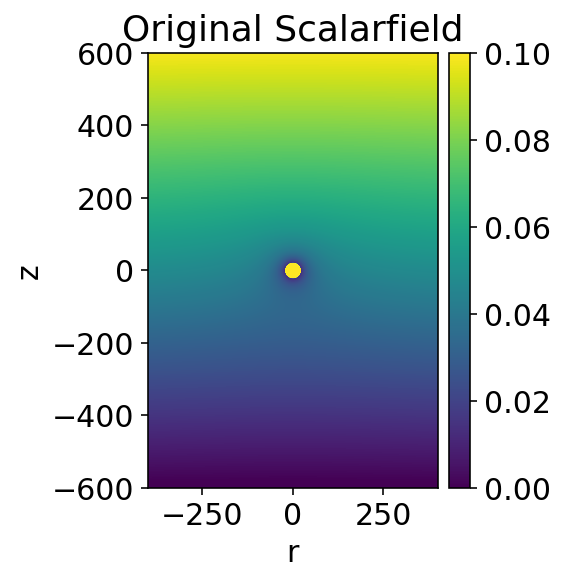

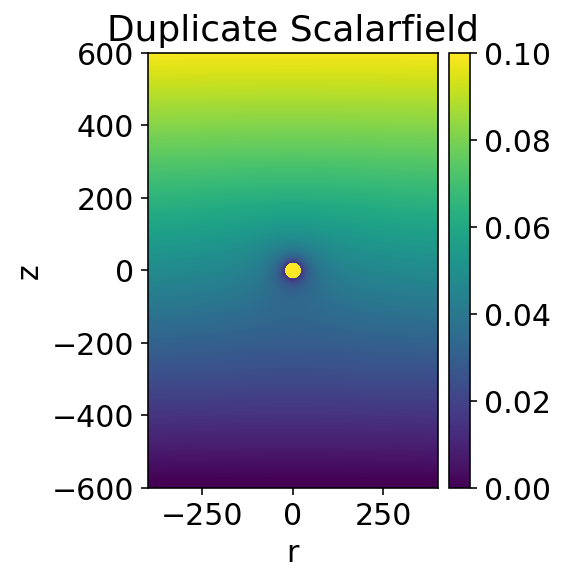

In [41]:
Initial_ScalarField.plot(title = 'Original Scalarfield', vmin = C_bottom_CH, vmax = C_top_CH)

Initial_ScalarField_copy.plot(title = 'Duplicate Scalarfield', vmin = C_bottom_CH, vmax = C_top_CH)

### Give all ok to write the files

In [42]:
answer = input("All ok?")

if answer == 'no':
    
    raise ValueError('..') 

All ok?yes


### Write out the files

In [43]:
file = open("KAPPA.out", "w")
file.write(str(KAPPA))
file.close() 

file = open("GAMMA.out", "w")
file.write(str(GAMMA))
file.close() 

file = open("INTERFACE_WIDTH.out", "w")
file.write(str(W))
file.close() 

######################################################################################################################

file = open("PREFACTOR_FREE_ENERGY_DENSITY.out", "w")
file.write(str(PREFACTOR_FREE_ENERGY_DENSITY))
file.close() 

file = open("MOBILITY.out", "w")
file.write(str(MOBILITY))
file.close()

In [44]:
file = open("limit_r.out", "w")
file.write(str(limit_r))
file.close()

file = open("limit_z.out", "w")
file.write(str(limit_z))
file.close()

################################################################################################################

file = open("AGM_SYSTEM_SIZE.out", "w")
file.write(str(AGM_SYSTEM_SIZE))
file.close()

################################################################################################################

file = open("C_bottom_CH.out", "w")
file.write(str(C_bottom_CH))
file.close()

file = open("C_top_CH.out", "w")
file.write(str(C_top_CH))
file.close()

file = open("mu_bottom_CH.out", "w")
file.write(str(mu_bottom_CH))
file.close()

file = open("mu_top_CH.out", "w")
file.write(str(mu_top_CH))
file.close()

################################################################################################################

file = open("C_bottom_y_AGM.out", "w")
file.write(str(C_bottom_y_AGM))
file.close()

file = open("C_top_y_AGM.out", "w")
file.write(str(C_top_y_AGM))
file.close()

In [45]:
# Alpha according to Eq 3.12 in Weber et al review

file = open("alpha.out", "w")
file.write(str(ALPHA))
file.close()

# Beta according to Eq 3.12 in Weber et al review

file = open("beta.out", "w")
file.write(str(BETA))
file.close()

### Make a MEGA file containing INFO

In [46]:
text_file = open("INFO-CH.txt", "w")

text_file.write("Version is %s \n" %VERSION)

################################################################################################################

text_file.write("\nCH_limit_r is 0 to %f \n" %limit_r)

text_file.write("CH_limit_z is 0 to %f \n" %limit_z)

text_file.write("\nAGM_SYSTEM_SIZE is 0 to %f \n" %AGM_SYSTEM_SIZE)

################################################################################################################

text_file.write("\nC_bottom_CH is %f \n" %C_bottom_CH)

text_file.write("C_top_CH is %f \n" %C_top_CH)

text_file.write("\nmu_bottom_CH is %f \n" %mu_bottom_CH)

text_file.write("mu_top_CH is %f \n" %mu_top_CH)

################################################################################################################

text_file.write("\nC_bottom_y_AGM is %f \n" %C_bottom_y_AGM)

text_file.write("C_top_y_AGM is %f \n" %C_top_y_AGM)

################################################################################################################

text_file.write("\nKAPPA is %f \n" %KAPPA)

text_file.write("PREFACTOR_FREE_ENERGY_DENSITY is %f \n" %PREFACTOR_FREE_ENERGY_DENSITY)

text_file.write("MOBILITY is %f \n" %MOBILITY)

################################################################################################################

text_file.write("\nGAMMA is %f \n" %GAMMA)

text_file.write("\nInterface Width is %f \n" %W)

################################################################################################################

text_file.write("\nALPHA is %f \n" %ALPHA)

text_file.write("BETA is %f \n" %BETA)

################################################################################################################

text_file.close()